# Unsupervised Learning: Trade&Ahead


### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
! pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data 
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Import label encoder
from sklearn import preprocessing

# to compute distances
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

## Data Overview

- Observations
- Sanity checks

In [ ]:
#Loading the dataset
data=pd.read_csv('/content/stock_data.csv')

In [ ]:
# saving the dataset to another variable to avoid change in the original dataset
df=data.copy()

In [ ]:
# Checking the number of rows and columns
df.shape

(340, 15)

In [ ]:
# viewing the first 5 rows of the dataset
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
# fixing the names of columns as there are spaces  in columns names
df.columns = [col.replace(" ", "_") for col in df.columns]
df.columns = [col.replace(".", "") for col in df.columns]

In [ ]:
df.head()

,Ticker_Symbol,Security,GICS_Sector,GICS_Sub_Industry,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS_Sector                   340 non-null    object 
 3   GICS_Sub_Industry             340 non-null    object 
 4   Current_Price                 340 non-null    float64
 5   Price_Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash_Ratio                    340 non-null    int64  
 9   Net_Cash_Flow                 340 non-null    int64  
 10  Net_Income                    340 non-null    int64  
 11  Earnings_Per_Share            340 non-null    float64
 12  Estimated_Shares_Outstanding  340 non-null    float64
 13  P/E_R

In [ ]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current_Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price_Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash_Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net_Cash_Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net_Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings_Per_Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated_Shares_Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E_Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


Observation:
    
* No missing values    

In [ ]:
df.drop(['Ticker_Symbol','Security'],axis=1,inplace=True)

In [ ]:
cat_columns=df.select_dtypes(include=['object','category']).columns.tolist()
num_columns=df.select_dtypes(include=np.number).columns.tolist()

In [ ]:
# checking number of each unique value in every column
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in GICS_Sector are :
Industrials                    53
Financials                     49
Health Care                    40
Consumer Discretionary         40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS_Sector, dtype: int64
**************************************************
Unique values in GICS_Sub_Industry are :
Oil & Gas Exploration & Production                 16
REITs                                              14
Industrial Conglomerates                           14
Electric Utilities                                 12
Internet Software & Services                       12
Health Care Equipment                              11
MultiUtilities                                     11
Banks                                              10
Property & Casualty Insurance      

Observation:
    
* Industrials is most frequent GICS Sector ,followed by Financials and Health care     
* Oil & Gas Exploration & Production is the most frequent sub industry ,followed by REITS and Industrial Comglemerates

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [ ]:
 # function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

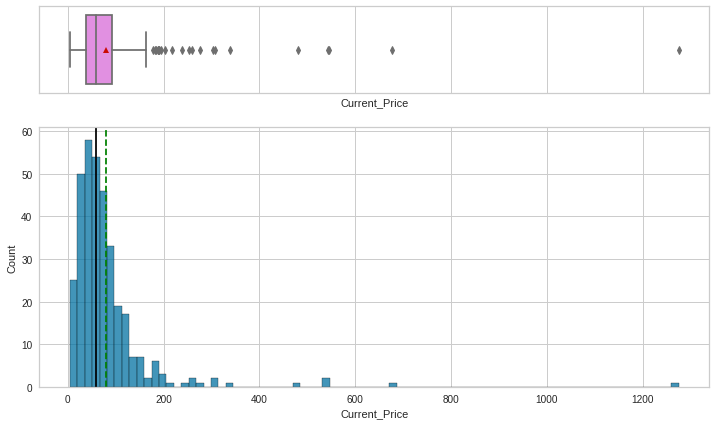

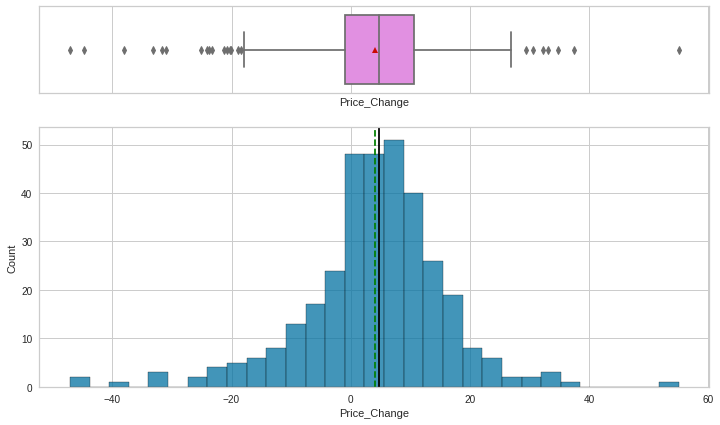

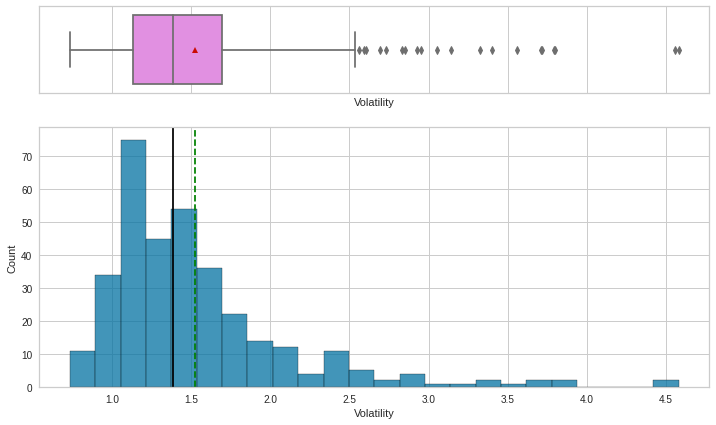

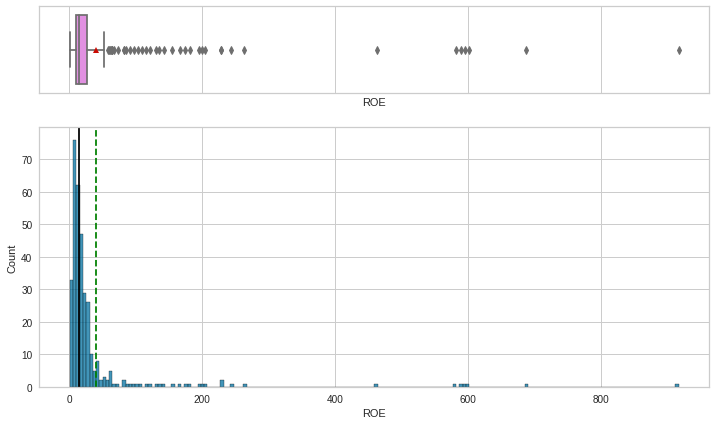

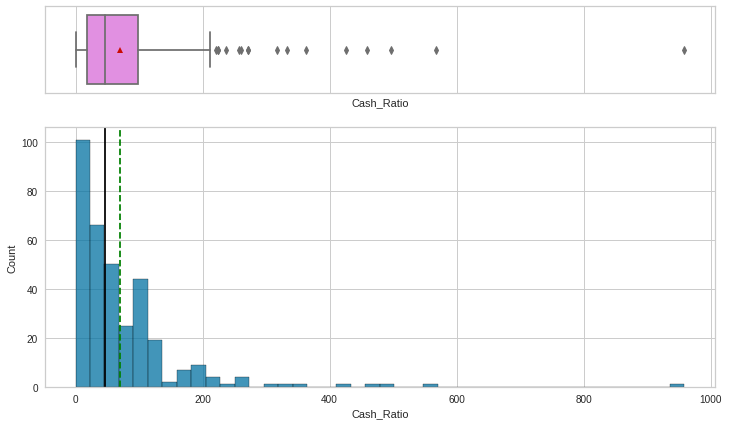

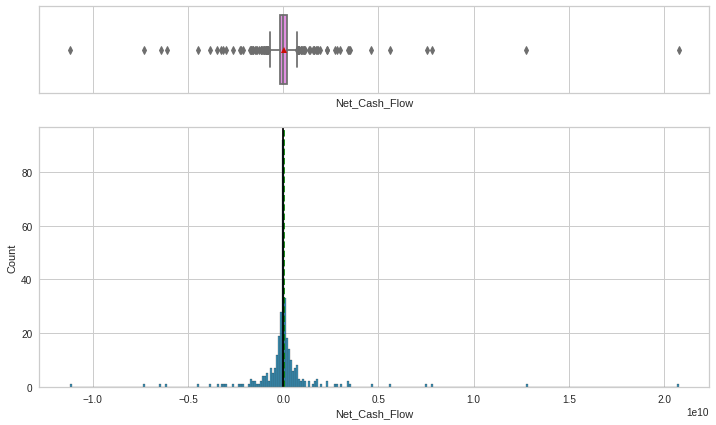

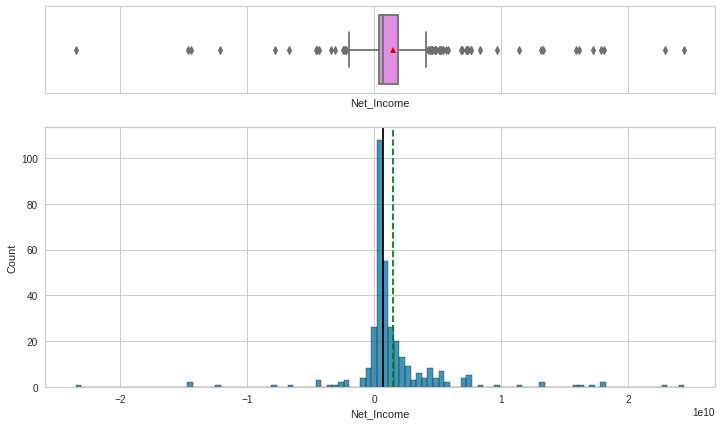

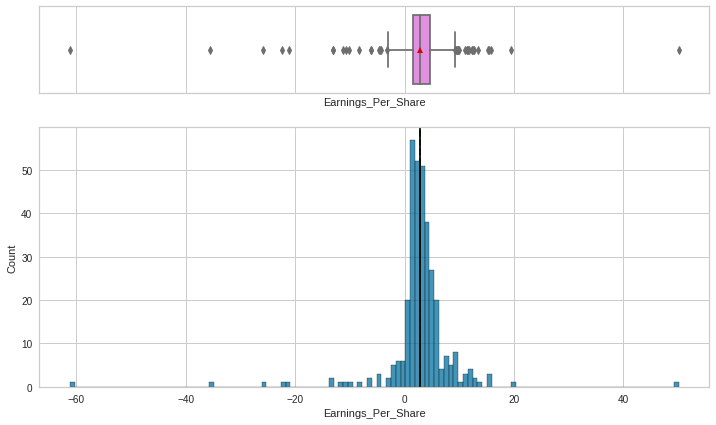

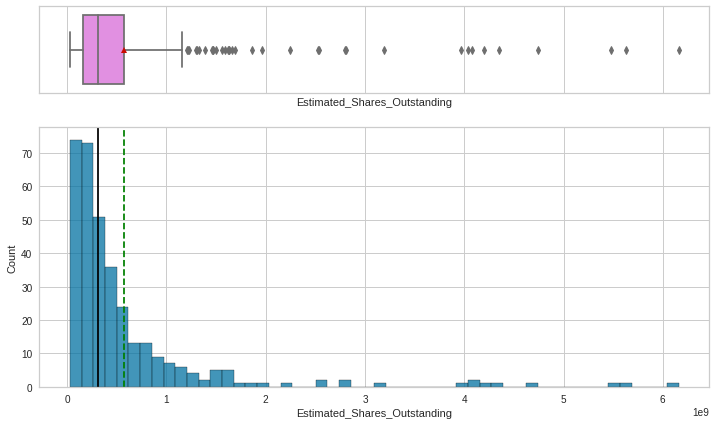

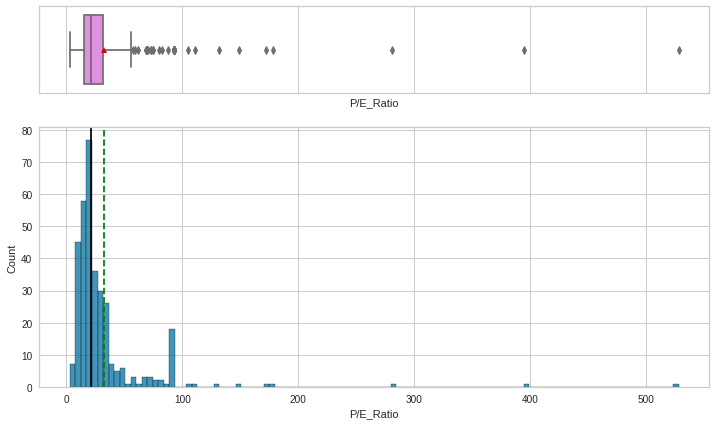

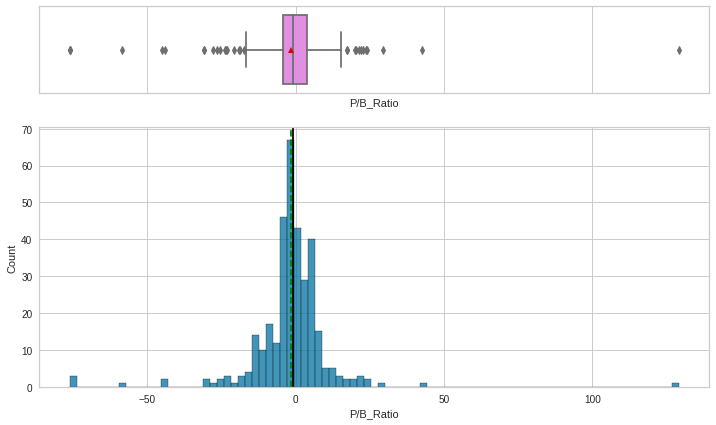

In [ ]:
for feature in df[num_columns]:
    histogram_boxplot(df[num_columns], feature, figsize=(12, 7), kde=False, bins=None) 

Obseravtion:
    
* The distribution of stock price is right skewed with outliers on the upper side
* Price change slightly left skewed with outliers on both side
* Volatiliy is right skewed with outliers on the upper side
* ROE is right skewed with outliers on the upper side
* Cash_Ratio is right skewed with outliers on the upper side
* Net_cash_flow is almost normally distributed with outliers on both side
* Net income is right skewed with outliers on both side

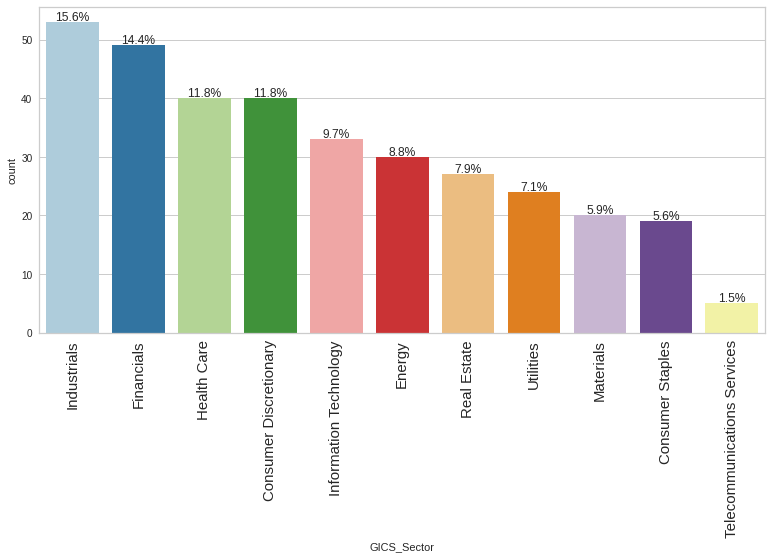

In [ ]:
labeled_barplot(df,'GICS_Sector', perc=True, n=None)
    

Observation:
    
* Industrials takes 15.6% of the sector    

<Figure size 1080x504 with 0 Axes>

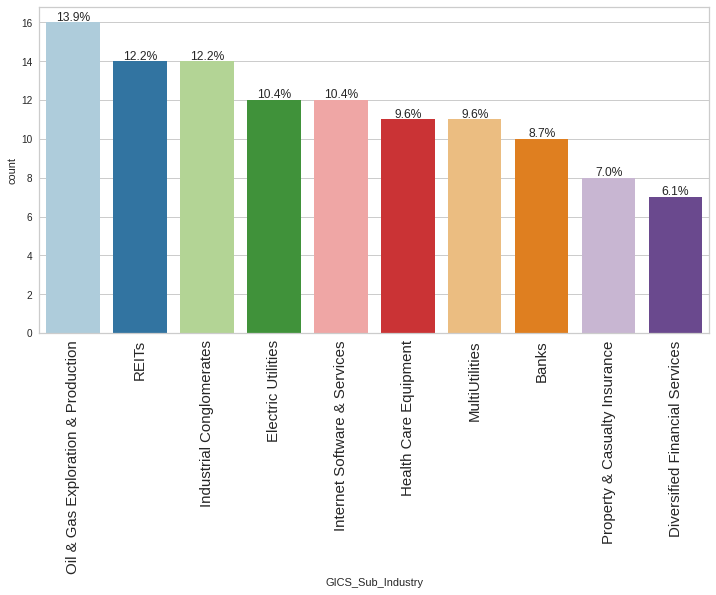

In [ ]:
# We identify the 10 top restaurants in terms of number

df['GICS_Sub_Industry'].value_counts().head(10)

# Creates a new list containing our top 10 GICS Sub Industry

top_10_Sub_Industry = [
    'Oil & Gas Exploration & Production',
    'REITs',
    'Industrial Conglomerates',
    'Electric Utilities',
    'Internet Software & Services',
    'Health Care Equipment',
    'MultiUtilities',
    'Banks',
    'Property & Casualty Insurance',
    'Diversified Financial Services',
    ]
# We create a new DataFrame with the 10 top Sub Industry
df_10_top_Sub_Industry=df.loc[df['GICS_Sub_Industry'].isin(top_10_Sub_Industry)]
plt.figure(figsize=(15,7))
labeled_barplot(df_10_top_Sub_Industry,'GICS_Sub_Industry', perc=True, n=None)

Observation:
    
* Oil & Gas Exploration & Production is the most frequent sub industry with    13.9%     

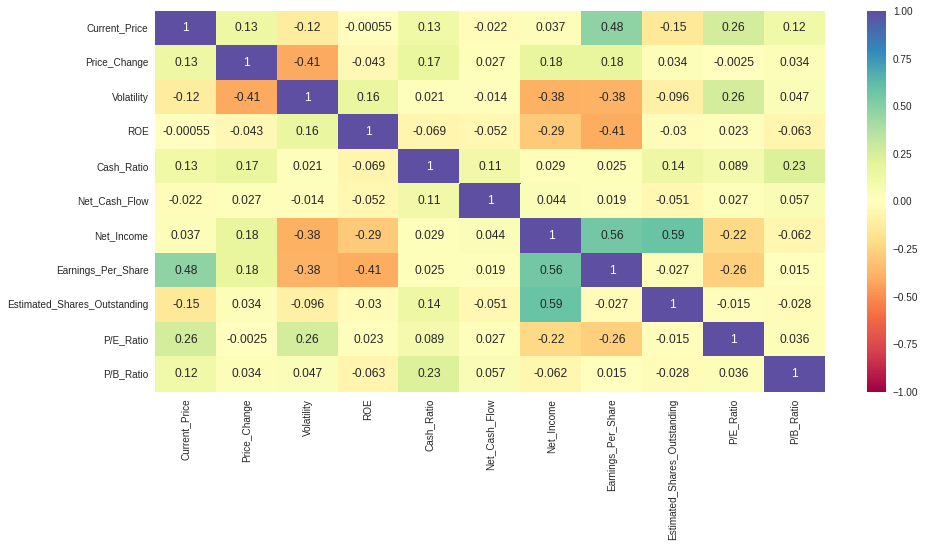

In [ ]:
# Heatmap to check the correlation between numerical data
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

Observation:
    
* There is no significant correlation between variables
* The highest correlation is between estimated shares outstanding and net income which is 59%

In [ ]:
cash_ratio_per_sector=df.groupby(['GICS_Sector'])['Cash_Ratio'].mean().sort_values(ascending=False).reset_index()
cash_ratio_per_sector

,GICS_Sector,Cash_Ratio
0,Information Technology,149.818182
1,Telecommunications Services,117.000000
2,Health Care,103.775000
3,Financials,98.591837
4,Consumer Staples,70.947368
5,Energy,51.133333
6,Real Estate,50.111111
7,Consumer Discretionary,49.575000
8,Materials,41.700000
9,Industrials,36.188679


Observation:
    
* Information Technology has the highest cash ratio, followed by Telecommunications Services and health care     

In [ ]:
PE_ratio_per_sector=df.groupby(['GICS_Sector'])['P/E_Ratio'].mean().sort_values(ascending=False).reset_index()
PE_ratio_per_sector

,GICS_Sector,P/E_Ratio
0,Energy,72.897709
1,Information Technology,43.782546
2,Real Estate,43.065585
3,Health Care,41.135272
4,Consumer Discretionary,35.211613
5,Consumer Staples,25.521195
6,Materials,24.585352
7,Utilities,18.719412
8,Industrials,18.259380
9,Financials,16.023151


Observation:
    
* Energy has the highest P/E Ratio ,follewed by Information Technology and Real Estate

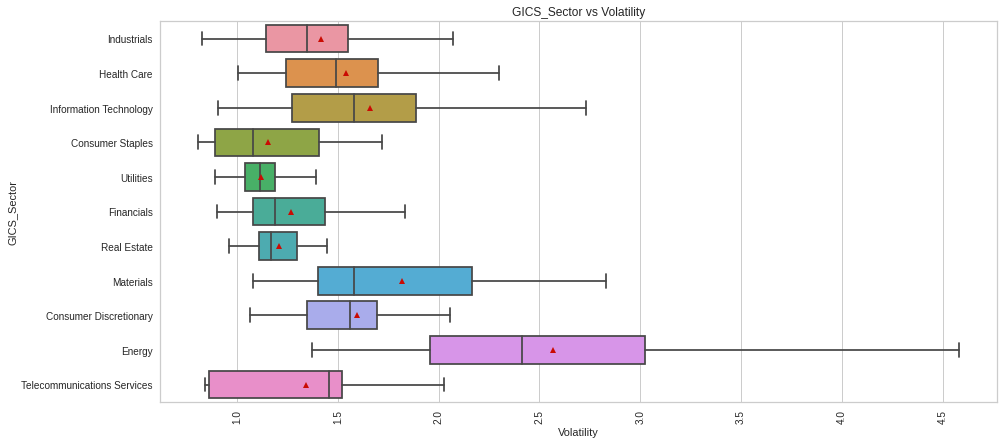

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='Volatility',y='GICS_Sector',showmeans=True,showfliers=False)
plt.xticks(rotation=90)
plt.title('GICS_Sector vs Volatility')
plt.show()

Observation:
    
* Energy has the highest volatility     

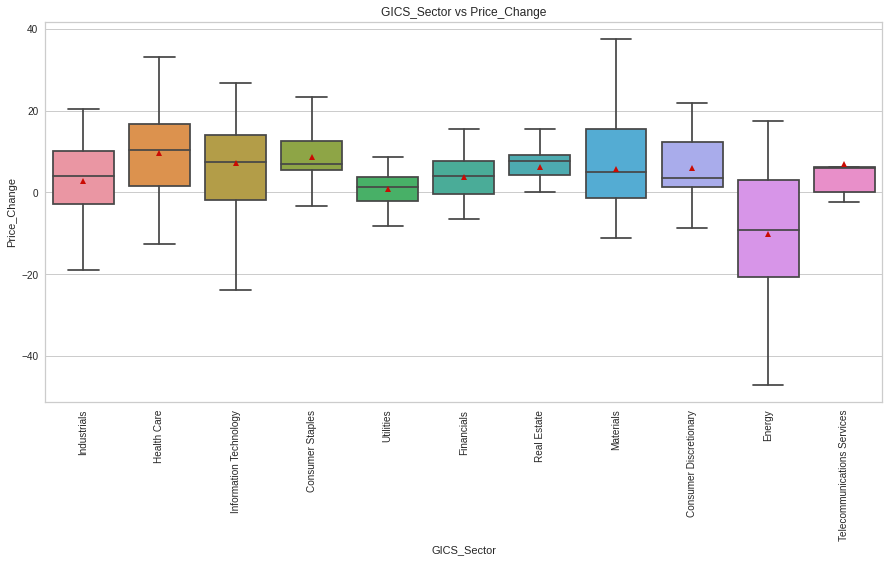

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='GICS_Sector',y='Price_Change',showmeans=True,showfliers=False)
plt.xticks(rotation=90)
plt.title('GICS_Sector vs Price_Change')
plt.show()

Observation:
    
Health care has face the highest price change among other sectors    

Observation:

Health care has seen the highest average increase of 9.6% followed by consuer stapples with 8.7%

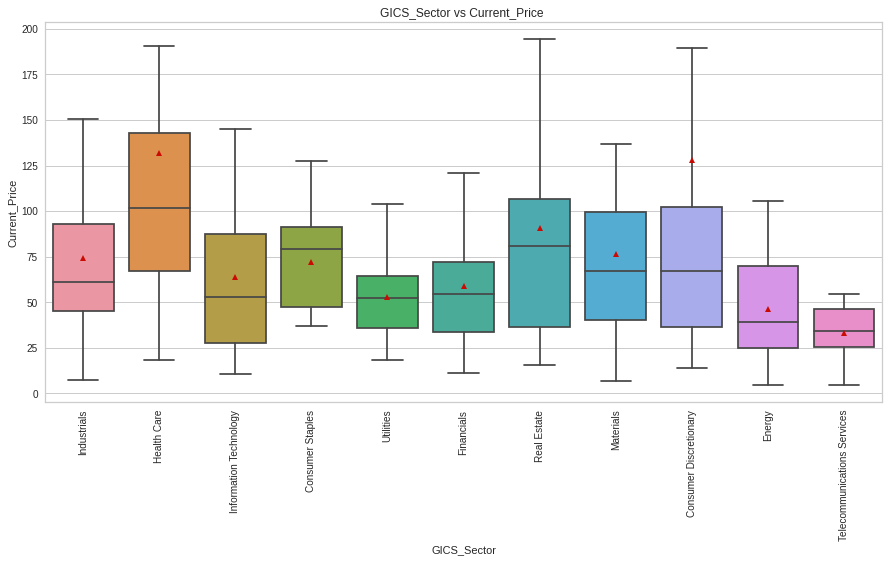

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='GICS_Sector',y='Current_Price',showmeans=True,showfliers=False)
plt.xticks(rotation=90)
plt.title('GICS_Sector vs Current_Price ')
plt.show()

Observation:
    
* Health has the highest current price follwed by Real Estate    

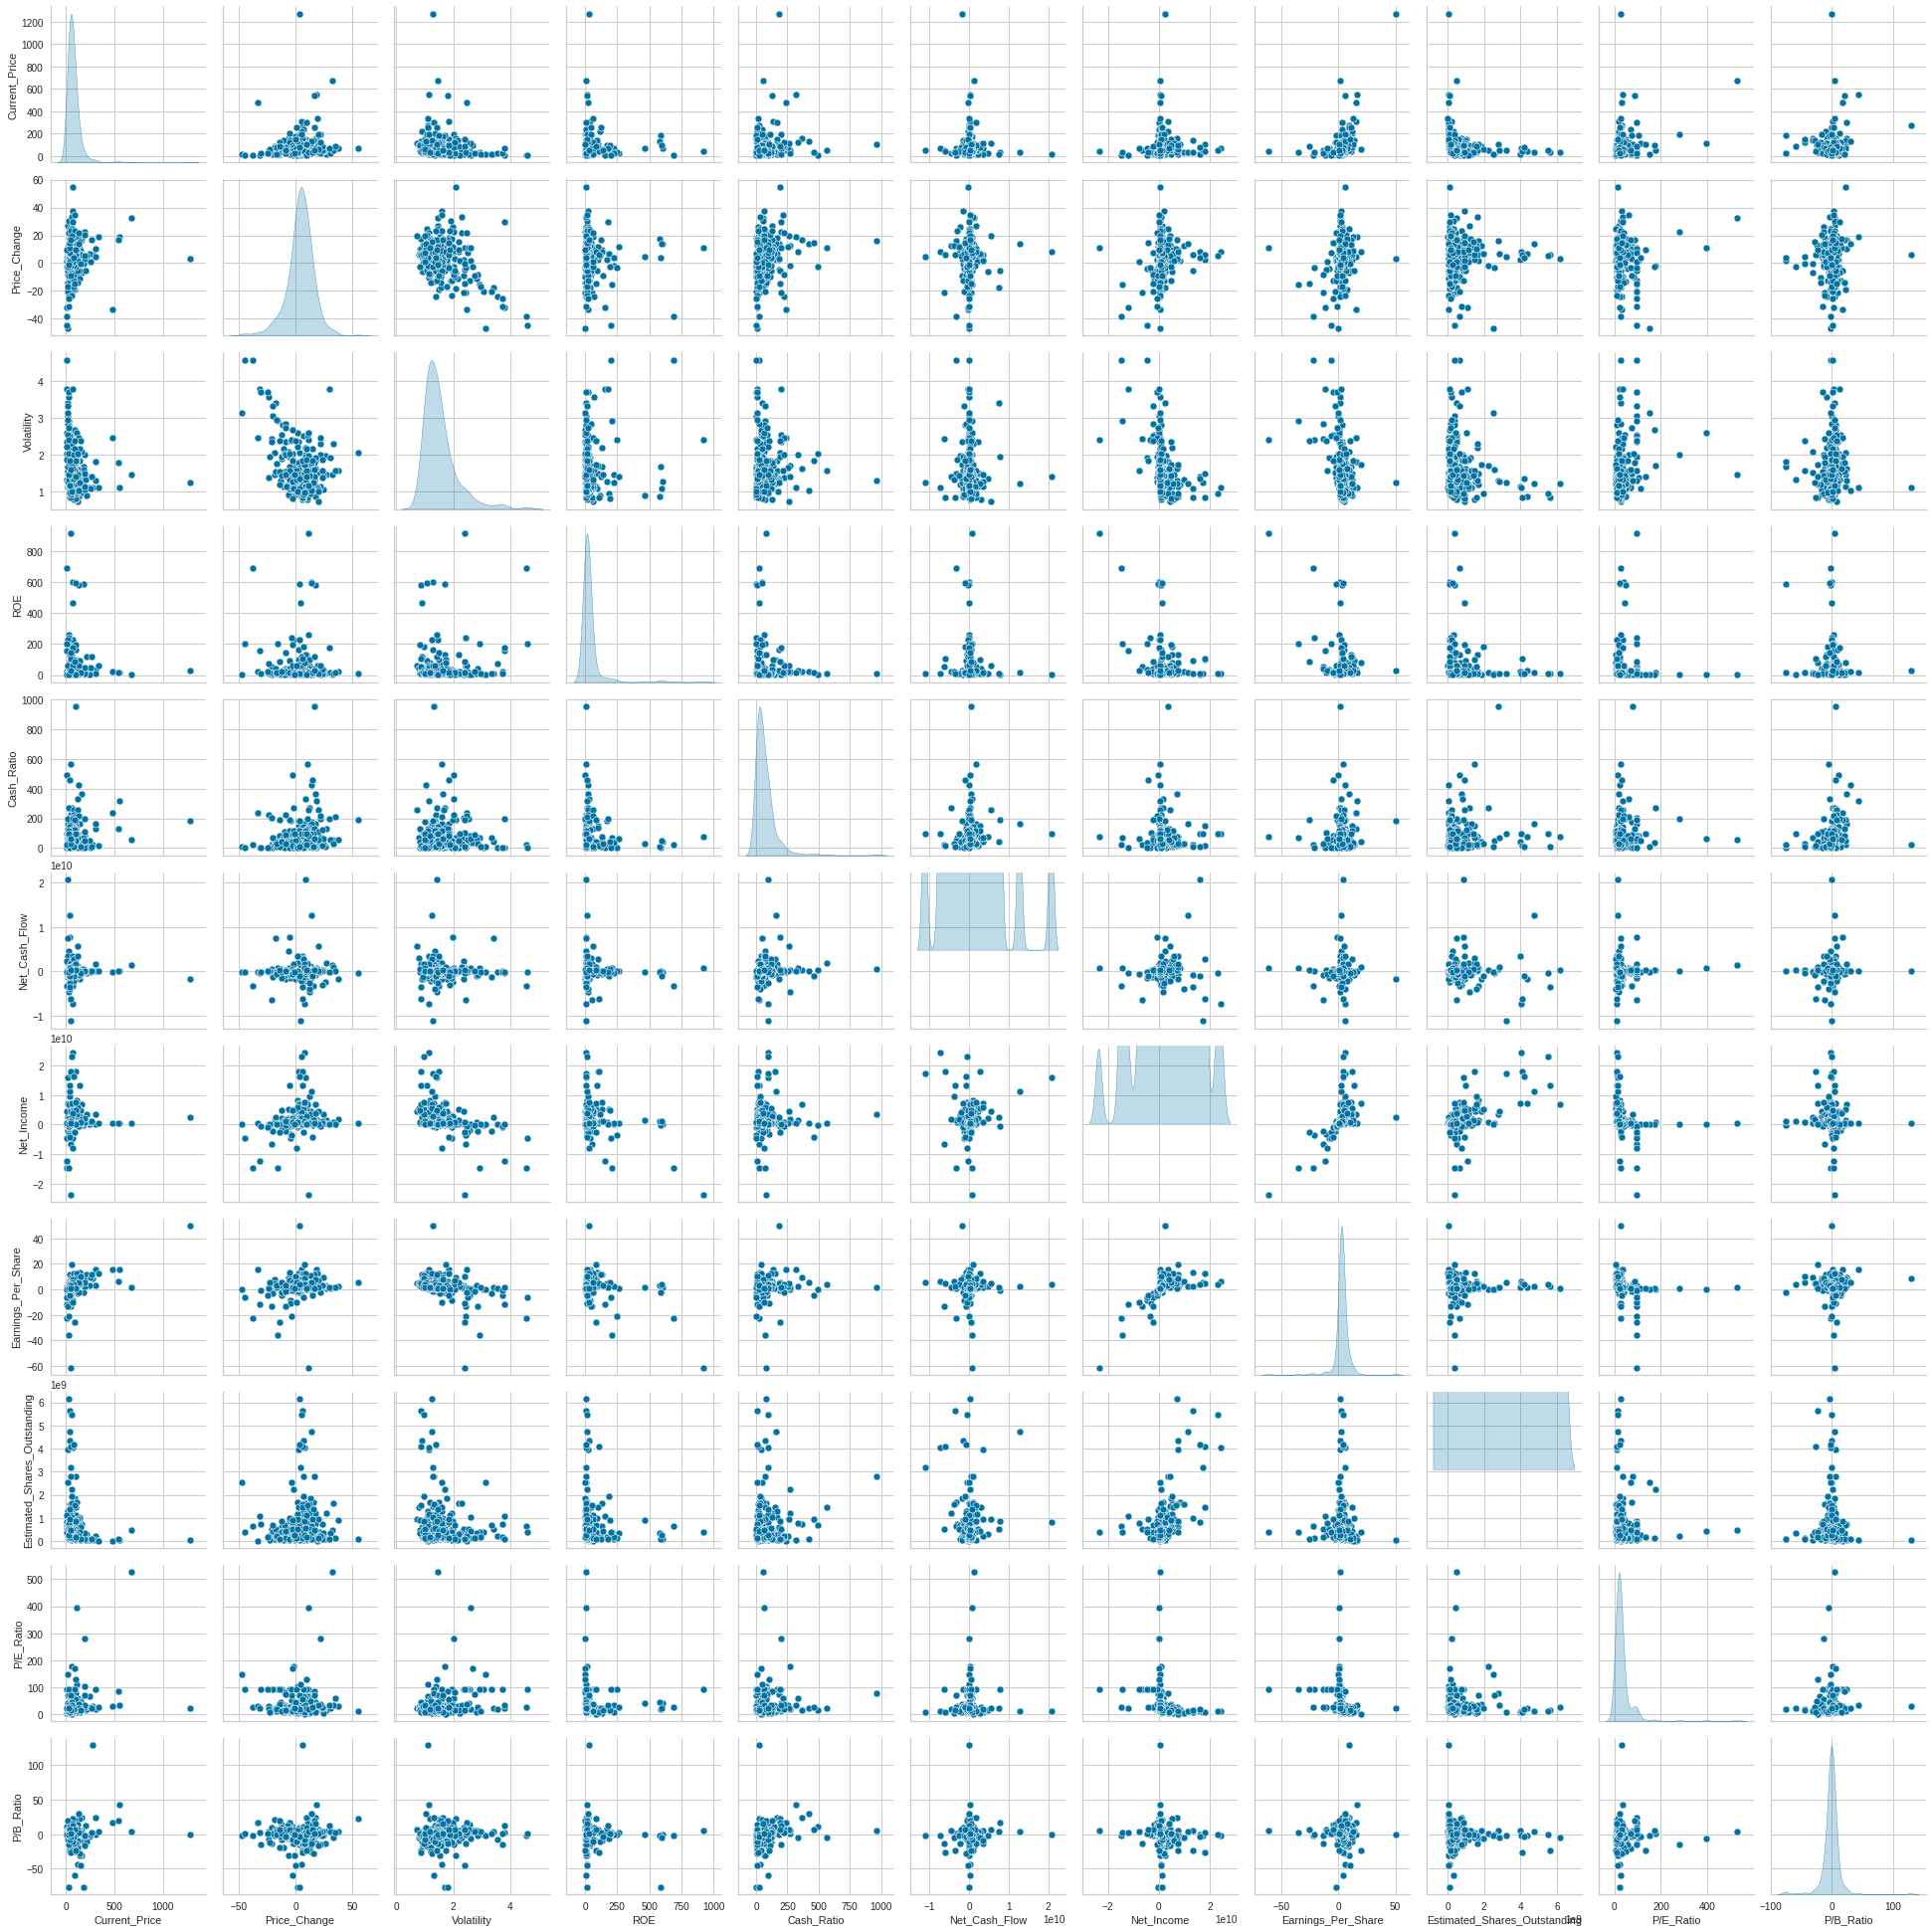

In [ ]:
sns.pairplot(data=df,diag_kind="kde")
plt.show()

Observation:
    
* There is no distinct pattrens between variables    

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [ ]:
df.duplicated().sum()

0

Observation:
    
* There are no duplicate values   

In [ ]:
df.isnull().sum()/df.isnull().count()

GICS_Sector                     0.0
GICS_Sub_Industry               0.0
Current_Price                   0.0
Price_Change                    0.0
Volatility                      0.0
ROE                             0.0
Cash_Ratio                      0.0
Net_Cash_Flow                   0.0
Net_Income                      0.0
Earnings_Per_Share              0.0
Estimated_Shares_Outstanding    0.0
P/E_Ratio                       0.0
P/B_Ratio                       0.0
dtype: float64

Observation:
    
* There are no missing values   

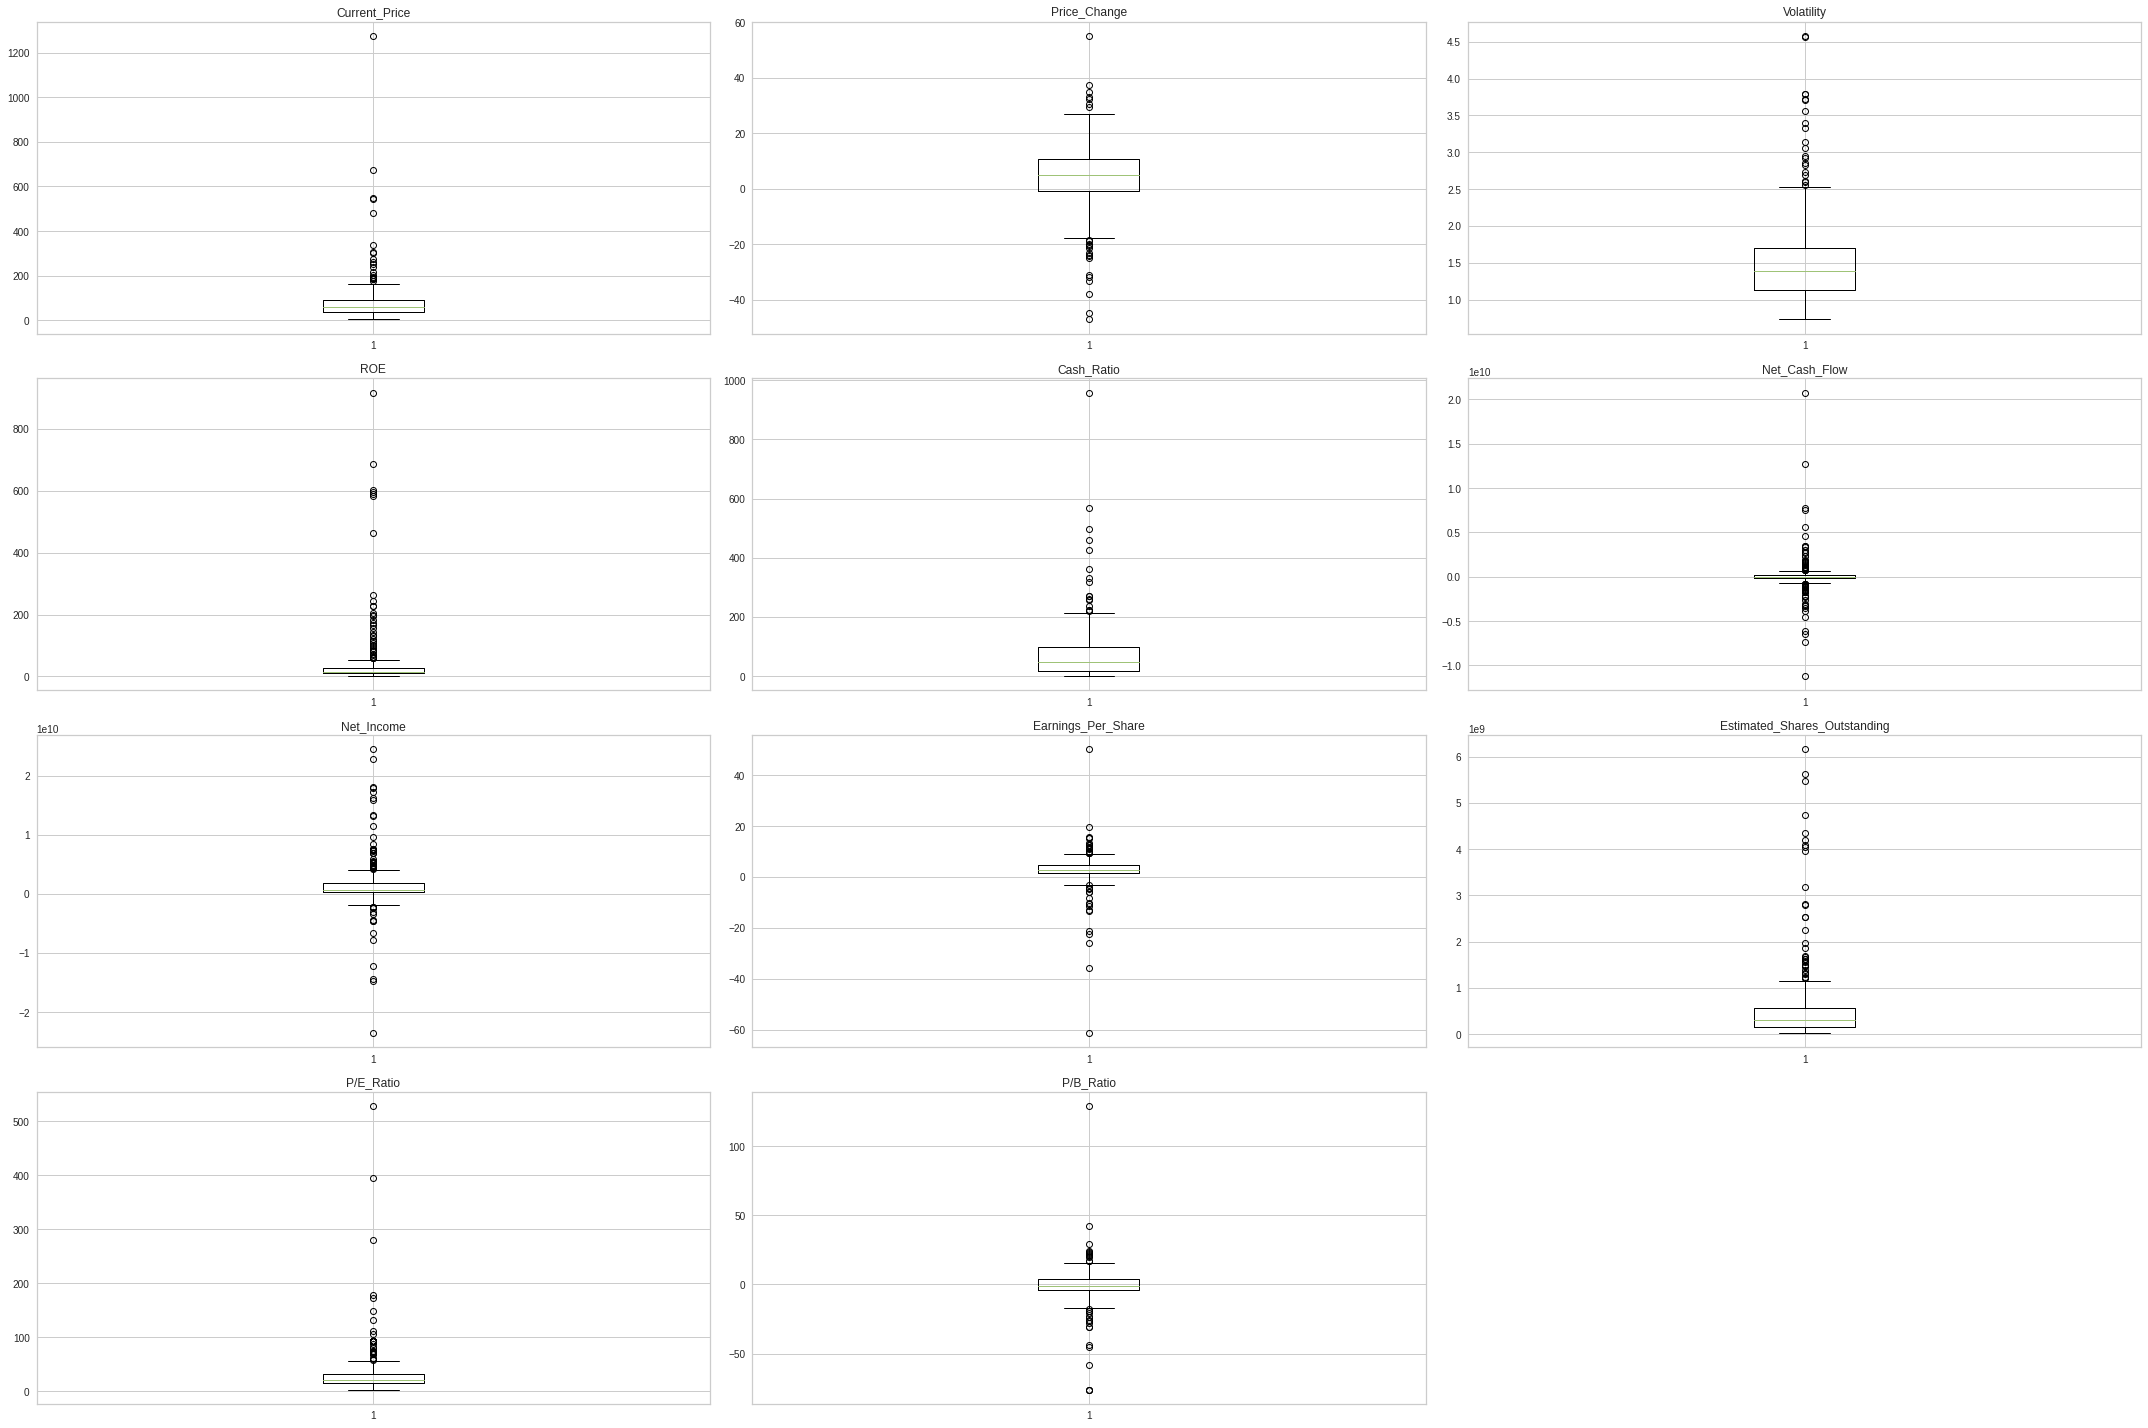

In [ ]:
num_columns= df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(30, 20))

for i, variable in enumerate(num_columns):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observation:

* We will not be treating the outliers since they are genuine values.

In [ ]:
df1=df.copy()

In [ ]:
df1.head()

,GICS_Sector,GICS_Sub_Industry,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
0,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
df1.drop(['GICS_Sector','GICS_Sub_Industry'],axis=1,inplace=True)

In [ ]:
#label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'GICS_Sector'.
#df['GICS_Sector']= label_encoder.fit_transform(df['GICS_Sector'])

# Encode labels in column 'GICS_Sub_Industry'.
#df['GICS_Sub_Industry']= label_encoder.fit_transform(df['GICS_Sub_Industry'])


#df['GICS_Sector']= label_encoder.inverse_transform(df['GICS_Sector'])
#df['GICS_Sub_Industry']= label_encoder.inverse_transform(df['GICS_Sub_Industry'])

In [ ]:
dfScaled=df1.apply(zscore)
dfScaled.head()

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2683105560042285
Number of Clusters: 4 	Average Distortion: 2.179645269703779
Number of Clusters: 5 	Average Distortion: 2.1314618178673848
Number of Clusters: 6 	Average Distortion: 2.0800662563374384
Number of Clusters: 7 	Average Distortion: 2.018362955485886
Number of Clusters: 8 	Average Distortion: 1.962985208935381
Number of Clusters: 9 	Average Distortion: 1.9210038430752612


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

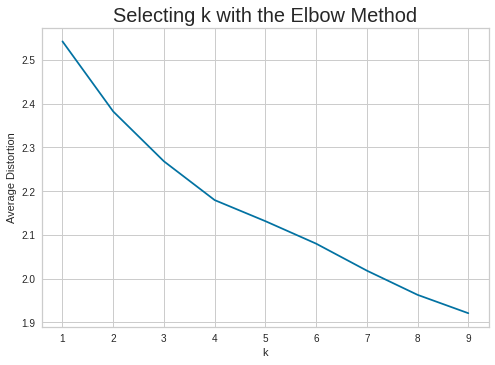

In [ ]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(dfScaled)
    prediction = model.predict(dfScaled)
    distortion = (
        sum(
            np.min(cdist(dfScaled, model.cluster_centers_, "euclidean"), axis=1)
        )
        / dfScaled.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**Based on Elbow curve , I will choose 4,5,6 as ks**

### Let's check the silhouette scores

For n_clusters = 2, silhouette score is 0.45335782729503565
For n_clusters = 3, silhouette score is 0.4623841900167334
For n_clusters = 4, silhouette score is 0.45057187532979753
For n_clusters = 5, silhouette score is 0.40999356683171667
For n_clusters = 6, silhouette score is 0.39935785683828356
For n_clusters = 7, silhouette score is 0.38712971806800905
For n_clusters = 8, silhouette score is 0.40744438179297693
For n_clusters = 9, silhouette score is 0.38086668239902466


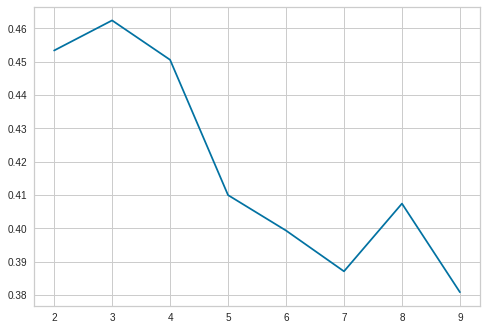

In [ ]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((dfScaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(dfScaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**From the silhouette scores, it seems that 5 is a good value of k.**

### Final model

In [ ]:
%%time

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(dfScaled)

CPU times: user 111 ms, sys: 1.04 ms, total: 112 ms
Wall time: 68.3 ms


KMeans(n_clusters=5, random_state=0)

In [ ]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

## Cluster Profiling

In [ ]:
cluster_profile = df.groupby("K_means_segments").mean()
cluster_profile


,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
K_means_segments,,,,,,,,,,,
0,246.574304,14.284326,1.769621,26.500000,279.916667,4.591202e+08,1.009206e+09,6.167917,5.494321e+08,90.097512,14.081386
1,41.373681,-14.849938,2.596790,27.285714,64.457143,3.446266e+07,-1.293864e+09,-2.459714,4.501004e+08,61.563930,2.476202
2,48.103077,6.053507,1.163964,27.538462,77.230769,7.732308e+08,1.411492e+10,3.958462,3.918735e+09,16.098039,-4.253404
3,72.783335,0.912232,2.015435,542.666667,34.000000,-3.508667e+08,-5.843678e+09,-14.735556,3.725000e+08,53.574485,-8.831054
4,72.768128,5.701175,1.359857,25.598456,52.216216,-9.130811e+05,1.537661e+09,3.719247,4.361146e+08,23.473934,-3.374716


In [ ]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("K_means_segments")["Volatility"].count().values
)
cluster_profile

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,,,
0,246.574304,14.284326,1.769621,26.500000,279.916667,4.591202e+08,1.009206e+09,6.167917,5.494321e+08,90.097512,14.081386,24
1,41.373681,-14.849938,2.596790,27.285714,64.457143,3.446266e+07,-1.293864e+09,-2.459714,4.501004e+08,61.563930,2.476202,35
2,48.103077,6.053507,1.163964,27.538462,77.230769,7.732308e+08,1.411492e+10,3.958462,3.918735e+09,16.098039,-4.253404,13
3,72.783335,0.912232,2.015435,542.666667,34.000000,-3.508667e+08,-5.843678e+09,-14.735556,3.725000e+08,53.574485,-8.831054,9
4,72.768128,5.701175,1.359857,25.598456,52.216216,-9.130811e+05,1.537661e+09,3.719247,4.361146e+08,23.473934,-3.374716,259


In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_min(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,,,
0,246.574304,14.284326,1.769621,26.500000,279.916667,459120250.000000,1009205541.666667,6.167917,549432140.538333,90.097512,14.081386,24
1,41.373681,-14.849938,2.596790,27.285714,64.457143,34462657.142857,-1293864285.714286,-2.459714,450100420.905143,61.563930,2.476202,35
2,48.103077,6.053507,1.163964,27.538462,77.230769,773230769.230769,14114923076.923077,3.958462,3918734987.169230,16.098039,-4.253404,13
3,72.783335,0.912232,2.015435,542.666667,34.000000,-350866666.666667,-5843677777.777778,-14.735556,372500020.988889,53.574485,-8.831054,9
4,72.768128,5.701175,1.359857,25.598456,52.216216,-913081.081081,1537660934.362934,3.719247,436114647.527683,23.473934,-3.374716,259


In [ ]:
# let's see the names of the GICS Sub Industry in each cluster
for cl in df["K_means_segments"].unique():
    print(
        "The",
        df[df["K_means_segments"] == cl]["GICS_Sub_Industry"].nunique(),
        "GICS_Sub_Industry in cluster",
        cl,
        "are:",
    )
    print(df[df["K_means_segments"] == cl]["GICS_Sub_Industry"].unique())
    print("-" * 100, "\n")

The 94 GICS_Sub_Industry in cluster 4 are:
['Airlines' 'Pharmaceuticals' 'Health Care Equipment'
 'Application Software' 'Agricultural Products' 'MultiUtilities'
 'Electric Utilities' 'Life & Health Insurance'
 'Property & Casualty Insurance' 'REITs' 'Multi-line Insurance'
 'Insurance Brokers' 'Specialty Chemicals' 'Semiconductor Equipment'
 'Electrical Components & Equipment' 'Asset Management & Custody Banks'
 'Specialized REITs' 'Specialty Stores' 'Managed Health Care'
 'Electronic Components' 'Home Entertainment Software' 'Residential REITs'
 'Semiconductors' 'Water Utilities' 'Consumer Finance'
 'Aerospace & Defense' 'Banks' 'Metal & Glass Containers'
 'Health Care Distributors' 'Auto Parts & Equipment'
 'Construction & Farm Machinery & Heavy Trucks' 'Real Estate Services'
 'Hotels, Resorts & Cruise Lines' 'Regional Banks' 'Household Products'
 'Air Freight & Logistics' 'Financial Exchanges & Data'
 'Industrial Machinery' 'Health Care Supplies' 'Railroads'
 'Integrated Telecommuni

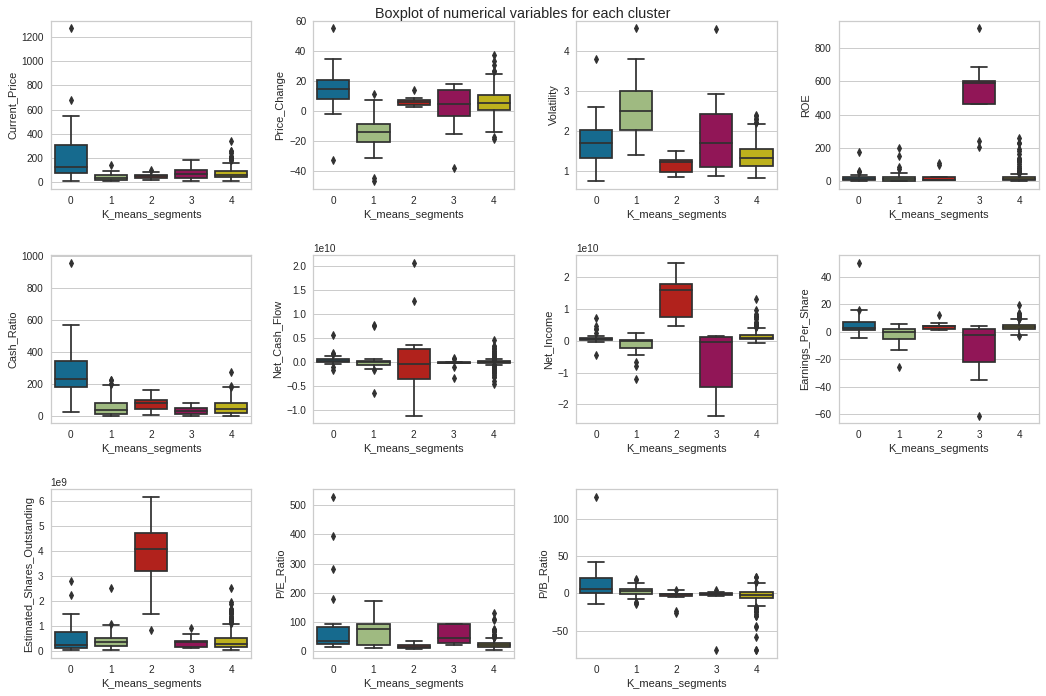

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

## Hierarchical Clustering

### Checking Cophenetic Correlation

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(dfScaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(dfScaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**Exploring different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(dfScaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(dfScaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


Observation:
    
* Average linkage is the best

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**It can be observed that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

### Checking Dendrograms

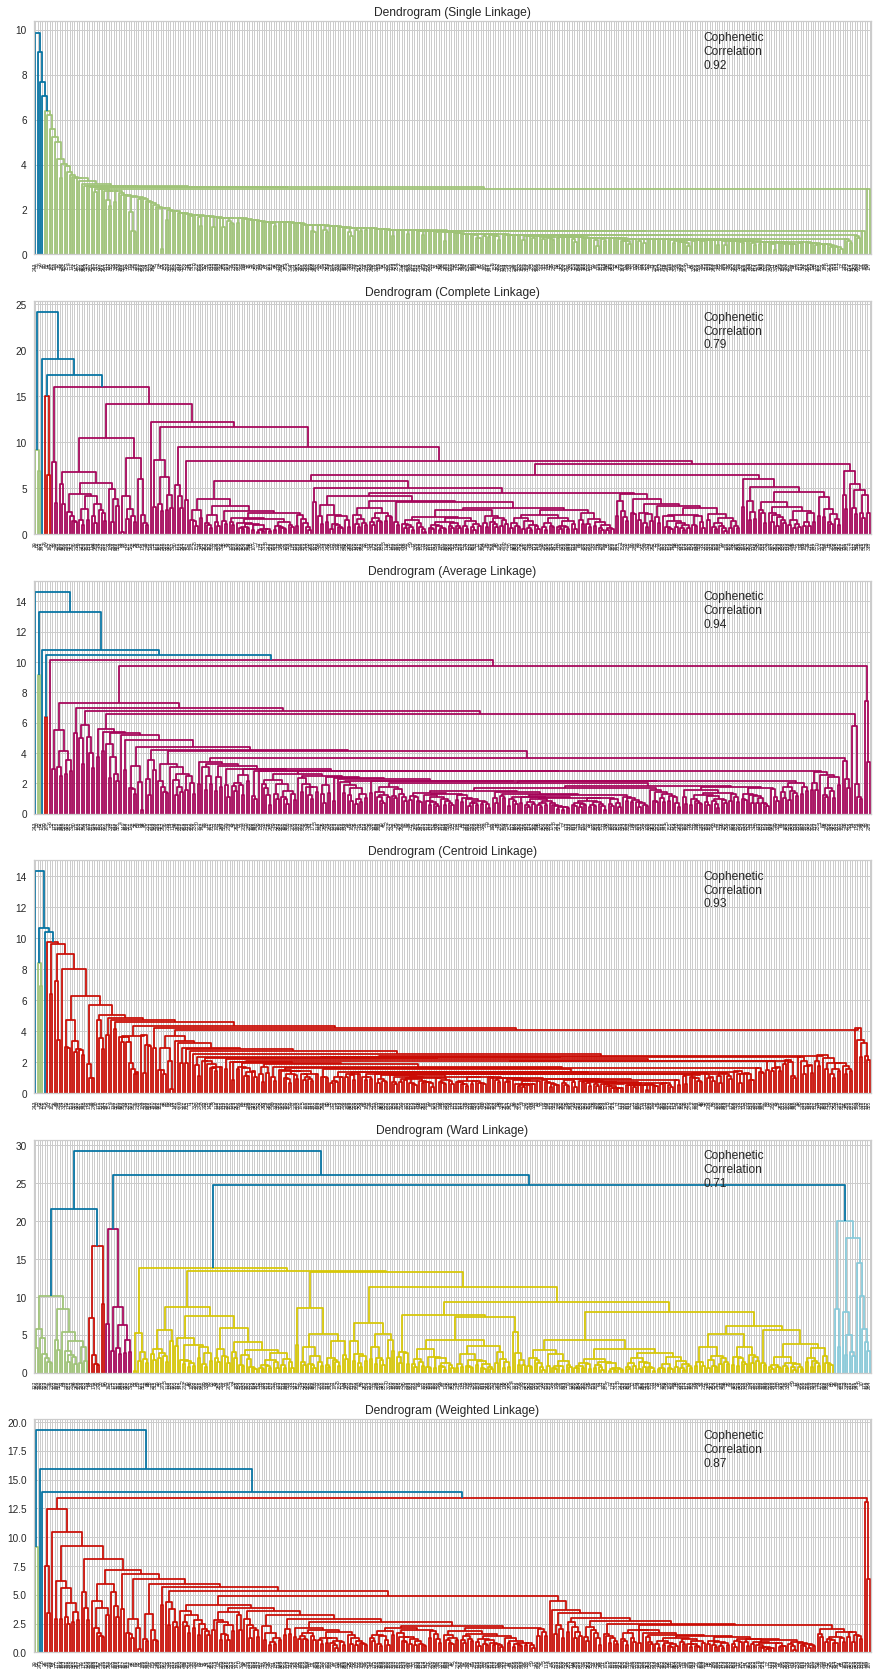

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(dfScaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(dfScaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average linkage methods.
- But it is clear that the dendrogram with Ward linkage gives us separate and distinct clusters.
- 5 would be the appropriate number of the clusters from the dendrogram with Ward linkage method. 

### Creating Model using sklearn

In [ ]:
%%time

HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(dfScaled)

CPU times: user 9.93 ms, sys: 0 ns, total: 9.93 ms
Wall time: 10.7 ms


AgglomerativeClustering(n_clusters=5)

In [ ]:
dfScaled["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
cluster_profile = df.groupby("HC_Clusters").mean()
cluster_profile

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,K_means_segments
HC_Clusters,,,,,,,,,,,,
0,326.198218,10.563242,1.642560,14.400000,309.466667,2.888507e+08,8.644985e+08,7.785333,5.449003e+08,113.095334,19.142151,0.000000
1,84.355716,3.854981,1.827670,633.571429,33.571429,-5.684000e+08,-4.968157e+09,-10.841429,3.981690e+08,42.284541,-11.589502,3.000000
2,42.848182,6.270446,1.123547,22.727273,71.454545,5.586364e+08,1.463127e+10,3.410000,4.242573e+09,15.242169,-4.924615,2.000000
3,72.760400,5.213307,1.427078,25.603509,60.392982,7.995151e+07,1.538594e+09,3.655351,4.464721e+08,24.722670,-2.647194,3.701754
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-4.728341e+08,-3.161045e+09,-8.005000,5.143678e+08,85.555682,0.836839,1.181818


In [ ]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Volatility"].count().values
)
cluster_profile

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,326.198218,10.563242,1.642560,14.400000,309.466667,2.888507e+08,8.644985e+08,7.785333,5.449003e+08,113.095334,19.142151,0.000000,15
1,84.355716,3.854981,1.827670,633.571429,33.571429,-5.684000e+08,-4.968157e+09,-10.841429,3.981690e+08,42.284541,-11.589502,3.000000,7
2,42.848182,6.270446,1.123547,22.727273,71.454545,5.586364e+08,1.463127e+10,3.410000,4.242573e+09,15.242169,-4.924615,2.000000,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,7.995151e+07,1.538594e+09,3.655351,4.464721e+08,24.722670,-2.647194,3.701754,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-4.728341e+08,-3.161045e+09,-8.005000,5.143678e+08,85.555682,0.836839,1.181818,22


In [ ]:
# let's see the names of the GICS Sub Industry in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["GICS_Sub_Industry"].nunique(),
        "GICS_Sub_Industry in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["GICS_Sub_Industry"].unique())
    print("-" * 100, "\n")

The 103 GICS_Sub_Industry in cluster 3 are:
['Airlines' 'Pharmaceuticals' 'Health Care Equipment'
 'Application Software' 'Semiconductors' 'Agricultural Products'
 'MultiUtilities' 'Electric Utilities' 'Life & Health Insurance'
 'Property & Casualty Insurance' 'REITs' 'Multi-line Insurance'
 'Insurance Brokers' 'Internet Software & Services' 'Specialty Chemicals'
 'Semiconductor Equipment' 'Electrical Components & Equipment'
 'Asset Management & Custody Banks' 'Specialized REITs' 'Specialty Stores'
 'Managed Health Care' 'Electronic Components' 'Aerospace & Defense'
 'Home Entertainment Software' 'Residential REITs' 'Water Utilities'
 'Consumer Finance' 'Banks' 'Biotechnology' 'Metal & Glass Containers'
 'Health Care Distributors' 'Auto Parts & Equipment'
 'Construction & Farm Machinery & Heavy Trucks' 'Real Estate Services'
 'Hotels, Resorts & Cruise Lines' 'Fertilizers & Agricultural Chemicals'
 'Regional Banks' 'Household Products' 'Air Freight & Logistics'
 'Financial Exchanges & D

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

* Hierarchical Clustering took less time for execution

* K-means gave more distinct clusters 

* K-means:cluster 0: 24 observations          
                  1: 35 observations
                  2: 13 observations
                  3: 9 observations
                  4: 259 observations
  Hierarchical: Cluster 0: 15 observations
                        1: 7 observations
                        2: 11 observations
                        3: 285 observations
                        4: 22 observations
                        
* The appropriate number of clusters for both is 5


## Actionable Insights and Recommendations

* **Cluster 0**:
    * This cluster contains companies that have good current price, cash ratio and Earnings_Per_Share
    
* **Cluster 1**:
    * This cluster contains companies that have bad current price,good price change ad higher volatility
    
* **Cluster 2**:
    * This cluster contains companies that have less volatility ,good Net_Cash_Flow,Net_Income,Earnings_Per_Share and P/E Ratio
    
    
* **Cluster 3**:
    * This cluster contains companies that have good ROE and P/B Ratio and bad Cash_Ratio,Net_Cash_Flow,Net_Income,
    Earnings_Per_Share and Estimated_Shares_Outstanding
    
* **Cluster 4**:
    * This cluster contains companies that have bad ROE

## Recommendations

* Trade&Ahead should advise their clients to invest in companies that are in cluster 2 as they have good Net_Cash_Flow,Net_Income,Earnings_Per_Share and P/E Ratio

*  Trade&Ahead should advise their client to avoid companies that are in cluster 3 as they have bad Cash_Ratio,Net_Cash_Flow,Net_Income, Earnings_Per_Share and Estimated_Shares_Outstanding

* They can also advise clients to invest in companies in cluster 4 as they have fairly good

**Compare Cluster vs GICS Sector**

In [ ]:
pd.crosstab(df.HC_Clusters, df.GICS_Sector).style.highlight_max(color="lightgreen", axis=0)

GICS_Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
HC_Clusters,,,,,,,,,,,
0,3,1,0,0,5,0,4,0,1,1,0
1,1,2,2,1,0,1,0,0,0,0,0
2,1,1,1,4,1,0,1,0,0,2,0
3,35,15,7,44,34,52,27,19,26,2,24
4,0,0,20,0,0,0,1,1,0,0,0


Obseravation:
    
* Financials and Telecommunications Services have higher number of companies in the cluster 2 which has companies to invest in
* Consumer Staples and Energ have higher number companies in cluster 3 wich has companies to avoid